In [2]:
import numpy as np
import gensim
import logging
import networkx as nx
import pandas as pd

In [2]:
dismissed_list = pd.read_csv('data/dismissed.csv')


In [11]:
dismissed = pd.read_csv('data/dismissed_complete.csv')
non_dismissed = pd.read_csv('data/nodismissed_complete.csv')

#Delete random columns to have same number of dimissed and non dismissed

indexes_drop = np.arange(len(non_dismissed)-len(dismissed))
np.random.shuffle(indexes_drop)
non_dismissed = non_dismissed.drop(indexes_drop, axis = 0)

index = list(range(len(dismissed), len(dismissed)+len(non_dismissed)))

#non_dismissed.set_index(range(0,len(non_dismissed)+len(dismissed)))
all_authors = pd.concat((dismissed, non_dismissed))

index = range(0,len(all_authors))
all_authors['index'] = index
all_authors = all_authors.set_index('index')


/home/jogarrid/.virtualenvs/MLproject/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [23]:
network = {'Author': [], 'Connections':[], 'Connections_id':[],'Connections_label':[],'Label':[], 'Per Fired': []}

#id dictionary that associates name and id for the authors
ids = {}
for coauthors_ in dismissed['Co-authors']:
    coauthors = coauthors_.split(',')
    #"Clean list coauthors of weird characters"
    coauthors_clean = []
    for j in range(len(coauthors)-1):
        coauthors_clean.append(coauthors[j][2:len(coauthors[j])-1])
    j = len(coauthors) - 1
    coauthors_clean.append(coauthors[j][2:len(coauthors[j])-2])
    #Cleaning of list finished

    for i in range(len(coauthors_clean)):
        author = coauthors_clean[i]
        if(author not in network['Author']):
            network['Author'].append(author)
            ids[author] = len(network['Author']) - 1
            network['Connections'].append(coauthors_clean) #An author will always be connected to himself
            if(author in dismissed_list['AU'].unique()):
                network['Label'].append(1) #fired
            else:  #non fired
                network['Label'].append(0) #fired

        else: #Author already part of the network
            #in which index is the author in the network?
            found = False
            i = 0
            while(not found):
                if(network['Author'][i] == author):
                    found = True
                    ix = i
                i += 1
            #index found
            #For each coauthor: add it to the network of the main author
            for coauthor in coauthors_clean:
                if(coauthor not in network['Connections'][ix]):
                    network['Connections'][ix].append(coauthor)
            
   

In [29]:
#Add connections_id, id of authors in the connections
errors = 0
network['Connections_id'] = []
network['Connections_label'] = []
for i in range(len(network['Author'])):
    indexes = []
    labels = []
    for connection in network['Connections'][i]:
        #Find ix of connection
            ix = ids[connection]
            label = network['Label'][ix]
            indexes.append(ix)
            labels.append(label)

    network['Connections_id'].append(indexes)
    network['Connections_label'].append(labels)

#Add fields no of connections fired and no of connections not fired 
network['Connections_fired'] = []
network['Connections_nofired'] = []
for i in range(len(network['Author'])):
    fired = sum(network['Connections_label'][i])
    network['Connections_fired'].append(fired)
    network['Connections_nofired'].append(len(network['Connections_label'][i]) - fired)
    network['Per Fired'].append(fired/len(network['Connections_label'][i]))
                                
network_pd = pd.DataFrame(network)

In [30]:
network_pd

,Author,Connections,Connections_id,Connections_label,Label,Per Fired,Connections_fired,Connections_nofired
0,Kul Sibel,"[Kul Sibel, Aydin Aydin, Dinc Hasan, Erduran E...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.166667,4,20
1,Aydin Aydin,"[Kul Sibel, Aydin Aydin, Dinc Hasan, Erduran E...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0.166667,4,20
2,Dinc Hasan,"[Kul Sibel, Aydin Aydin, Dinc Hasan, Erduran E...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.166667,4,20
3,Erduran Erol,"[Kul Sibel, Aydin Aydin, Dinc Hasan, Erduran E...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0.166667,4,20
4,Aydin Leyla,"[Aydin Leyla, Aydin Aydin, Bulbul Baris, Ozkal...","[4, 1, 5, 6, 7, 8, 14629, 14630, 14631, 14632]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",1,0.200000,2,8
5,Bulbul Baris,"[Aydin Leyla, Aydin Aydin, Bulbul Baris, Ozkal...","[4, 1, 5, 6, 7, 8, 14629, 14630, 14631, 14632]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.200000,2,8
6,Ozkalkan Beliz,"[Aydin Leyla, Aydin Aydin, Bulbul Baris, Ozkal...","[4, 1, 5, 6, 7, 8, 14629, 14630, 14631, 14632]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.200000,2,8
7,Ozaydin Cansu,"[Aydin Leyla, Aydin Aydin, Bulbul Baris, Ozkal...","[4, 1, 5, 6, 7, 8, 14629, 14630, 14631, 14632]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.200000,2,8
8,Inaltekin Ezgi,"[Aydin Leyla, Aydin Aydin, Bulbul Baris, Ozkal...","[4, 1, 5, 6, 7, 8, 14629, 14630, 14631, 14632]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.200000,2,8
9,Aksoy Hamit Zafer,"[Aydin Aydin, Aksoy Hamit Zafer, Reis Abdulkad...","[1, 9, 10, 11, 12301, 18499, 20925, 431, 20926...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0,0.333333,7,14


In [33]:
dismissed['Co-authors'][0]

,Unnamed: 0,Author,Title paper,Journal,Year,Keywords,Co-authors,labels
0,0,AU=AYDIN AYDIN,"[Widespread involvement of hepatic, renal and ...",[TURKISH JOURNAL OF PEDIATRICS],[2007],"[mycotic aneurysm, visceral arteries, mesenter...","['Kul Sibel', 'Aydin Aydin', 'Dinc Hasan', 'Er...",1.0
1,1,AU=AYDIN AYDIN,[Temporal Analysis of Finger-Tapping Test in I...,[ACTA PHYSIOLOGICA],[2015],NaN,"['Aydin Leyla', 'Aydin Aydin', 'Bulbul Baris',...",1.0
2,2,AU=AYDIN AYDIN,[UNDIFFERENTIATED CARCINOMA OF THE EPIDIDYMIS],[ACTA CLINICA CROATICA],[2011],"[Epididymis, Undiffrentiated carcinomas, Metas...","['Aydin Aydin', 'Aksoy Hamit Zafer', 'Reis Abd...",1.0
3,3,AU=AYDIN AYDIN,[Undifferentiated Primary Carcinoma of the Epi...,[UHOD-ULUSLARARASI HEMATOLOJI-ONKOLOJI DERGISI],[2009],"[Epididymis, Undifferentiated carcinoma, Adjuv...","['Zengin Ahmet Y.', 'Topkan Erkan', 'Aydin Ayd...",1.0
4,4,AU=GİLGİL ERDAL,[Internal iliac artery pseudoaneurysm - An unu...,[AMERICAN JOURNAL OF PHYSICAL MEDICINE & REHAB...,[2008],"[lumbosacral plexopathy, sciatica, pseudoaneur...","['Melikoglu Meltem Alkan', 'Kocabas Hilal', 'S...",1.0
5,5,AU=GİLGİL ERDAL,[Bone metabolism and mineral density in patien...,[SAUDI MEDICAL JOURNAL],[2007],NaN,"['Dundar Umit', 'Kupesiz Alphan', 'Ozdem Sehah...",1.0
6,6,AU=GİLGİL ERDAL,[Reply to the report: epidemiology of rheumato...,[CLINICAL RHEUMATOLOGY],[2006],NaN,"['Gilgil Erdal', 'Kacar Cahit', 'Tuncer Tiraje']",1.0
7,7,AU=GİLGİL ERDAL,[Prevalence of Rheumatoid Arthritis and Spondy...,[ARCHIVES OF RHEUMATOLOGY],[2018],"[Epidemiology, prevalence, rheumatoid arthriti...","['Tuncer Tiraje', 'Gilgil Erdal', 'Kacar Cahit...",1.0
8,8,AU=GİLGİL ERDAL,[Medial collateral ligament bursitis in a pati...,[JOURNAL OF BACK AND MUSCULOSKELETAL REHABILIT...,[2018],"[Medial collateral ligament (MCL), bursitis, k...","['Nur Hakan', 'Aytekin Ayca', 'Gilgil Erdal']",1.0
9,9,AU=HALAÇ METİN,[Diagnostic value of magnetic resonance imagin...,[MEDICAL ONCOLOGY],[2008],"[Breast cancer, MRI, Bone scan, Bone metastasis]","['Yilmaz Mehmet Halit', 'Ozguroglu Mustafa', '...",1.0


In [35]:
dismissed['Co-authors'][1]

"['Aydin Leyla', 'Aydin Aydin', 'Bulbul Baris', 'Ozkalkan Beliz', 'Ozaydin Cansu', 'Inaltekin Ezgi']"

In [32]:
network['Connections'][1]

['Kul Sibel',
 'Aydin Aydin',
 'Dinc Hasan',
 'Erduran Erol',
 'Aydin Leyla',
 'Bulbul Baris',
 'Ozkalkan Beliz',
 'Ozaydin Cansu',
 'Inaltekin Ezgi',
 'Aksoy Hamit Zafer',
 'Reis Abdulkadir',
 'Ozdemir Feyyaz',
 'Zengin Ahmet Y.',
 'Topkan Erkan',
 'Reis A. Kadir',
 'Ozturk M. Halil',
 'Sari Ahmet',
 'Cakir Ertugrul',
 'Gazioglu Gurkan',
 'Kuzeyli Kayhan',
 'Sert Burak',
 'Arslan Mehmet',
 'Kosucu Polat',
 'Ahmetoglu Ali']

/home/jogarrid/.virtualenvs/MLproject/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


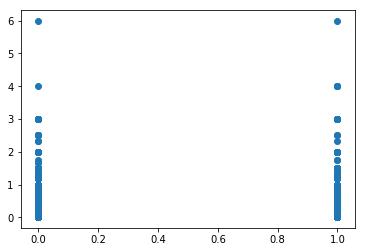

In [63]:
import matplotlib.pyplot as plt
#Is there a relationship between percentage of connections that were fired and label?
plt.figure()
plt.scatter(network['Label'], np.array(network['Connections_fired'])/(np.array(network['Connections_nofired']) ))
plt.show()

In [1]:
#plt.scatter(network['Label'], np.array(network['Connections_fired'])/(np.array(network['Connections_nofired'])+np.array(network['Connections_fired'])))

v_fired = network_pd[network_pd['Label']==1]
v_noFired = network_pd[network_pd['Label']==0]

#Box plot with quantiles 

#v_fired = network['Connections_fired'][ixFired]/(network['Connections_nofired'][ixFired]+network['Connections_fired'][ixFired])
#v_nofired = network['Connections_fired'][ixNoFired]/(network['Connections_nofired'][ixNoFired]+network['Connections_fired'][ixNoFired])
plt.figure()
plt.boxplot([v_noFired['Per Fired'], v_fired['Per Fired']])
plt.
network_pd['Per Fired'].describe()


SyntaxError: invalid syntax (<ipython-input-1-8e7798c7d65d>, line 12)

In [54]:
v_fired

,Author,Connections,Connections_id,Connections_label,Label,Per Fired,Connections_fired,Connections_nofired
1,Aydin Aydin,"[Kul Sibel, Aydin Aydin, Dinc Hasan, Erduran E...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0.166667,4,20
4,Aydin Leyla,"[Aydin Leyla, Aydin Aydin, Bulbul Baris, Ozkal...","[4, 1, 5, 6, 7, 8, 14629, 14630, 14631, 14632]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",1,0.200000,2,8
19,Gilgil Erdal,"[Melikoglu Meltem Alkan, Kocabas Hilal, Sezer ...","[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0.140845,10,61
74,Halac Metin,"[Yilmaz Mehmet Halit, Ozguroglu Mustafa, Mert ...","[67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 7...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...",1,0.120879,11,80
80,Zincirkeser Sabri,"[Halac Metin, Zincirkeser Sabri, Soenmezoglu K...","[74, 80, 79, 81, 82, 83, 84, 85, 86, 87, 88, 8...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...",1,0.216216,8,29
88,Demir Adalet,"[Halac Metin, Ergull Nurhan, Sager Sait, Demir...","[74, 87, 81, 88, 89, 86, 669, 670, 671, 672, 6...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0.137931,4,25
91,Ozturk Serkan,"[Gedikli Omer, Ozturk Serkan, Yilmaz Hulya, Ba...","[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...","[0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,0.152318,23,128
94,Kiris Abdulkadir,"[Gedikli Omer, Ozturk Serkan, Yilmaz Hulya, Ba...","[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...","[0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,0.152318,23,128
96,Baltaci Davut,"[Gedikli Omer, Ozturk Serkan, Yilmaz Hulya, Ba...","[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...","[0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,0.152318,23,128
99,Erem Cihangir,"[Baykan Merih, Erem Cihangir, Gedikli Oemer, H...","[93, 99, 100, 101, 102, 103, 104, 94, 105, 106...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",1,0.166667,10,50


In [50]:
import scipy

#Correlation between label and percentage of connections fired
rho1, p_value1 = scipy.stats.pearsonr( np.array(network['Connections_fired'])/(np.array(network['Connections_nofired'])+np.array(network['Connections_fired'])), network['Label'])

#Correlation between label and absolute number of connections fired
rho2, p_value2 = scipy.stats.pearsonr(network['Label'], network['Connections_fired'])

#Correlation between label and absolute number of connections fired
rho3, p_value3 = scipy.stats.pearsonr(network['Label'], network['Connections_nofired'])

In [23]:
#Average number of connections
n_con = 0
for connections in network['Connections']:
    n_con += len(connections)

n_av = n_con / len(network['Author'])
print('The average number of connections is: ', n_av)

The average number of connections is:  28.46721042857663


p_value3

In [49]:
#Next steps:

#See predictive power through taking into account no_fired, no_nofired

#Apply NLP to journal name

0.015963891438981217

In [99]:
network = {'Author': [], 'Connections':[], 'Label':[]}
for coauthors_ in dismissed['Co-authors']:
    coauthors = coauthors_.split(',')
    #"Clean list coauthors of weird characters"
    coauthors_ = []

    for j in range(len(coauthors)):
        coauthors_.append(coauthors[j][2:len(coauthors[j])-1])
    print(coauthors_)


    if(author not in network['Author']):
        network['Author'].append(author)
        network['Connections'].append(coauthors[1:])
        if(author in dismissed_list['AU'].unique()):
            network['Label'].append(1) #fired
        else:  #non fired
            network['Label'].append(0) #fired
    else: 
        found = False
        i = 0
        while(not found):
            if(network['Author'][i] == author):
                found = True
                ix = i
            i += 1
        coauthors_ = []
        
        #For each coauthor: add it to the network of the main author
        for coauthor in coauthors_:
            if(coauthor not in network['Connections'][ix]):
                network['Connections'][ix].append(coauthor)